Loading in the relevant Packages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
import lightkurve

/Users/lupitatovar/anaconda3/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/lupitatovar/.lightkurve/cache. Please move all the files in the legacy directory /Users/lupitatovar/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


Adding in some extra commands to make our plots look nicer

In [2]:
plt.rcParams['axes.linewidth']=1.5
plt.rcParams["font.size"] = 20
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ['Verdana']

Columns (20 days of data Sept/Oct 2016)

Time(BJD_TDB-2450000)

flux err_

flux position_x 

position_y 

fwhm 

fwhm_x 

fwhm_y 

background 

texp

Loading in the Spitzer Data

In [3]:
spitzerlc = pd.read_csv('spitzer_lc.csv')
spitzerlc
#plt.scatter(spitzerlc.Time.values,spitzerlc.Flux.values)

,Unnamed: 0,Time,Flux,fluxerr,x_pos,y_pos,fwhm,fwhm_x,fwhm_y,bkgd,na,texp
0,0,7440.290155,0.995960,0.000830,16.037032,16.096065,1.1306,1.280963,1.297885,7.681587,1.0,1.92
1,1,7440.291640,0.995621,0.000761,16.051365,16.136889,1.1443,1.280474,1.359159,6.559925,1.0,1.92
2,2,7440.293139,0.993556,0.000879,16.047302,16.121444,1.1385,1.280257,1.330890,6.029081,1.0,1.92
3,3,7440.294645,0.994836,0.000820,16.061065,16.109097,1.1332,1.268556,1.312878,6.284184,1.0,1.92
4,4,7440.296133,0.995061,0.000961,16.062635,16.104222,1.1279,1.263904,1.304400,7.433231,1.0,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...
29298,183,8777.283721,0.999813,0.000883,15.900778,16.060333,1.2310,1.405451,1.342257,10.230150,1.0,1.92
29299,184,8777.285217,0.999738,0.000947,15.904952,16.058968,1.1560,1.398691,1.339653,10.923340,1.0,1.92
29300,185,8777.286715,1.000731,0.000782,15.900381,16.053000,1.2100,1.407723,1.333829,10.201580,1.0,1.92
29301,186,8777.288213,1.001476,0.000814,15.910476,16.050619,1.1880,1.391920,1.327574,10.311040,1.0,1.92


Creating variables for each of the columns in the table 

In [4]:
time = spitzerlc['Time'].values
flux = spitzerlc['Flux'].values
flux_err = spitzerlc['fluxerr'].values
xpos = spitzerlc['x_pos'].values
ypos = spitzerlc['y_pos'].values

Text(0.5, 1.0, 'TRAPPIST-1 Spitzer Data')

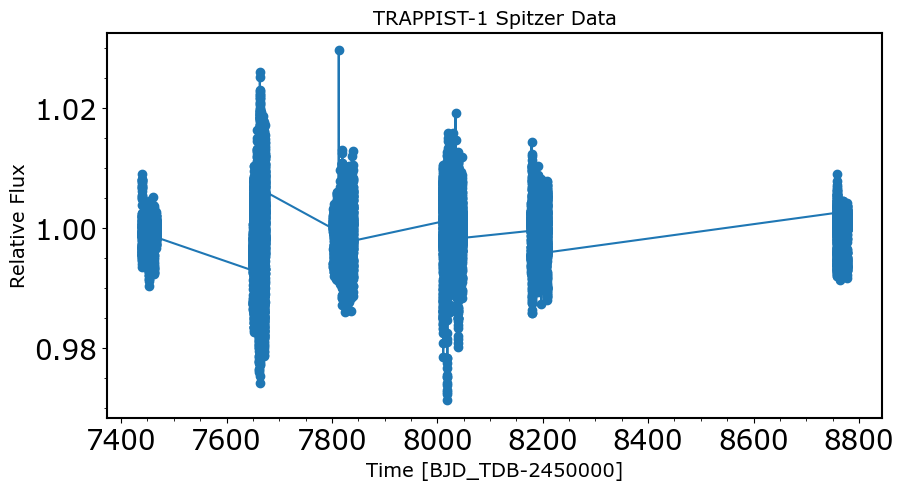

In [5]:
plt.figure(figsize=(10,5))
plt.plot(time,flux,marker='o')
#plt.xlim(7653,7655)
plt.xlabel('Time [BJD_TDB-2450000]',fontsize=14)
plt.ylabel('Relative Flux',fontsize=14)
plt.minorticks_on()
plt.title('TRAPPIST-1 Spitzer Data',fontsize=14)

Transforming Time units to calendar days

In [6]:
#convert to JD
jd = time + 2450000
jd

array([2457440.290155  , 2457440.29164024, 2457440.29313884, ...,
       2458777.28671474, 2458777.28821264, 2458777.28971014])

In [7]:
from astropy.time import Time
# Convert to astropy Time object + 2450000
t = Time(jd, format='jd')

# Convert to datetime
utc = t.to_datetime()

In [8]:
utc

array([datetime.datetime(2016, 2, 21, 18, 57, 49, 391924),
       datetime.datetime(2016, 2, 21, 18, 59, 57, 716796),
       datetime.datetime(2016, 2, 21, 19, 2, 7, 195837), ...,
       datetime.datetime(2019, 10, 20, 18, 52, 52, 153585),
       datetime.datetime(2019, 10, 20, 18, 55, 1, 572154),
       datetime.datetime(2019, 10, 20, 18, 57, 10, 956124)], dtype=object)

Text(0, 0.5, 'Relative Flux')

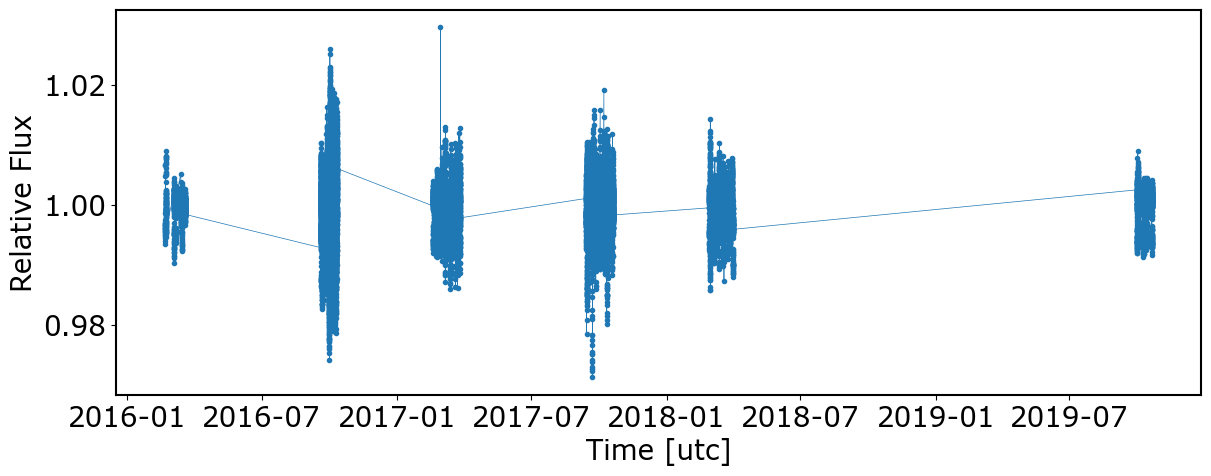

In [9]:
plt.figure(figsize=(14,5))
plt.plot(utc,flux,lw=0.5,marker='.')
plt.xlabel('Time [utc]')
plt.ylabel('Relative Flux')

### Loading in the flare data

In [10]:
flares = pd.read_csv('final_flares_list.csv')
flares

,t_start (BJD),t_stop (BJD),amplitude (flux),tpeak (BJD),fwhm (BJD),duration (BJD),Duration(min)
0,7655.9680,7655.9800,NaN,NaN,NaN,0.0120,17.280
1,7659.3750,7659.4200,NaN,NaN,NaN,0.0450,64.800
2,7667.1200,7667.2300,NaN,NaN,NaN,0.1100,158.400
3,7671.1220,7671.1400,NaN,NaN,NaN,0.0180,25.920
4,7807.8130,7807.8270,0.00700,NaN,NaN,0.0140,20.160
5,7809.5458,7809.5548,0.00416,NaN,NaN,0.0090,12.960
6,8021.1600,8021.2170,0.01600,8021.163,8021.167,0.0570,82.080
7,8046.8120,8046.8200,0.00700,8046.816,8046.810,0.0080,11.520
8,8184.9649,8184.9721,0.00700,NaN,NaN,0.0072,10.368
9,8186.9834,8186.9942,0.00200,NaN,NaN,0.0108,15.552


In [11]:
tstart = flares['t_start (BJD)'].values
tstop = flares['t_stop (BJD)'].values
amp = flares['amplitude (flux)'].values
dur_min = flares['Duration(min)'].values

In [12]:
len(flares)

16

### Detrending the light curve

We will discuss this part on Monday

### Calculating equivalent durations:

Integrating the relative flux of a single flare results in a quantity known as the “equivalent duration”
(see Hunt-Walker et al. 2012 https://iopscience.iop.org/article/10.1086/666495/pdf), which has units of time (typically seconds).

ED is defined as the amount of time that it would take the star, in its quiescent state, to release
the same amount of energy released during the flare (time integral)

In [13]:
ed = np.zeros_like(tstart)
for k in range(len(tstart)):
    x = np.where((time >= tstart[k]) & (time <= tstop[k]))
    ed[k] = np.trapz(flux[x]-1, x=(time[x] * 86400.)) #convert days to min

print(ed)

[ 1.62376938 15.65786695 34.35697569  3.12488175  0.03463524  1.5070696
 29.38476261  2.2041793   1.54698351 -0.2335951   0.50941176  3.0354067
  0.97558254  1.50248772  0.12354361 -0.21747303]


In [14]:
print(len(ed))

16


A flare event with an equivalent duration of P = 1 s has, by definition, an energy equal to the star’s quiescent luminosity integrated for 1 s

### Creating FFD

Flare frequency distribution diagrams tell us about the occurence rate of flares on stars as a function of flare energy.

How many flares of a certain energy are happening per day

x-axis : log (energy of flares) units erg

y-axis: # of flares (days)

In [15]:
Lo= 30.324911006834004 #spitzer; #kepler = 30.04, tess = 30.35 from 2020 paper (using flux cal ref spectra)
data_sort = np.argsort(ed)[::-1] #sorting our eds
ffd_time = np.nanmedian(np.diff(time)) * (len(time)) #number of days of data you have for T1
nu = (np.arange(1, len(ed)+1)) / ffd_time #frequency of flares per day

In [16]:
np.arange(1, len(ed[data_sort])+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
print(nu)

[0.02278422 0.04556843 0.06835265 0.09113686 0.11392108 0.1367053
 0.15948951 0.18227373 0.20505794 0.22784216 0.25062638 0.27341059
 0.29619481 0.31897902 0.34176324 0.36454746]


In [18]:
print(ffd_time) # this is how many total days of data we have

43.89003323788529


In [22]:
print(nu)
print(nu[data_sort])
print(ed[data_sort])

[0.02278422 0.04556843 0.06835265 0.09113686 0.11392108 0.1367053
 0.15948951 0.18227373 0.20505794 0.22784216 0.25062638 0.27341059
 0.29619481 0.31897902 0.34176324 0.36454746]
[0.06835265 0.15948951 0.04556843 0.09113686 0.27341059 0.18227373
 0.02278422 0.20505794 0.1367053  0.31897902 0.29619481 0.25062638
 0.34176324 0.11392108 0.36454746 0.22784216]
[34.35697569 29.38476261 15.65786695  3.12488175  3.0354067   2.2041793
  1.62376938  1.54698351  1.5070696   1.50248772  0.97558254  0.50941176
  0.12354361  0.03463524 -0.21747303 -0.2335951 ]


In [24]:
ffd_x = np.log10(ed[data_sort]) + (Lo)
print(ffd_x)
ffd_y = np.log10(nu[data_sort])
print(ffd_y)

[31.86092593 31.79303319 31.51964361 30.81974459 30.8071279  30.66815793
 30.53543536 30.51439669 30.50304432 30.50172194 30.31417503 30.03197998
 29.41673131 28.86442925         nan         nan]
[-1.16524466 -0.79726787 -1.34133591 -1.04030592 -0.56318466 -0.73927592
 -1.64236591 -0.6881234  -0.86421466 -0.49623787 -0.52842256 -0.60097322
 -0.46627465 -0.94339591 -0.43824593 -0.64236591]


/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_45275/557281536.py:1: RuntimeWarning: invalid value encountered in log10
  ffd_x = np.log10(ed[data_sort]) + (Lo)


### Plotting the FFD

Text(29, -1.6, 'N=16 events')

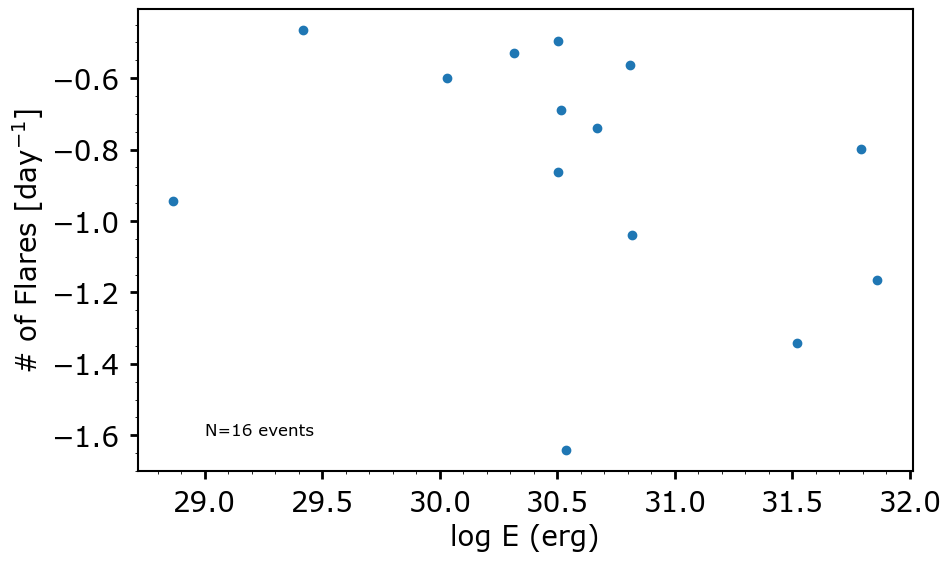

In [21]:
plt.figure(figsize=[10,6])
plt.minorticks_on()
plt.tick_params(direction='out',width=2,length=6,pad=7)


#Plotting the FFD
plt.plot(ffd_x,ffd_y,'o')
plt.xlabel('log E (erg)')
#plt.ylim(1e-2,1e0)
#plt.ylabel(r'log $\nu$ (day$^{-1}$)')
plt.ylabel('# of Flares [day$^{-1}$]')
#plt.yscale('log')

plt.text(29,-1.6,'N=16 events', fontsize=12)

### plot FFD in equivalent durartion space 

/var/folders/qt/5k94vxpj21j50gmh6vcpwn5h0000gn/T/ipykernel_45275/723403575.py:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(ed[data_sort]*60),ffd_y,'o')


Text(0.5, -1.6, 'N=16 events')

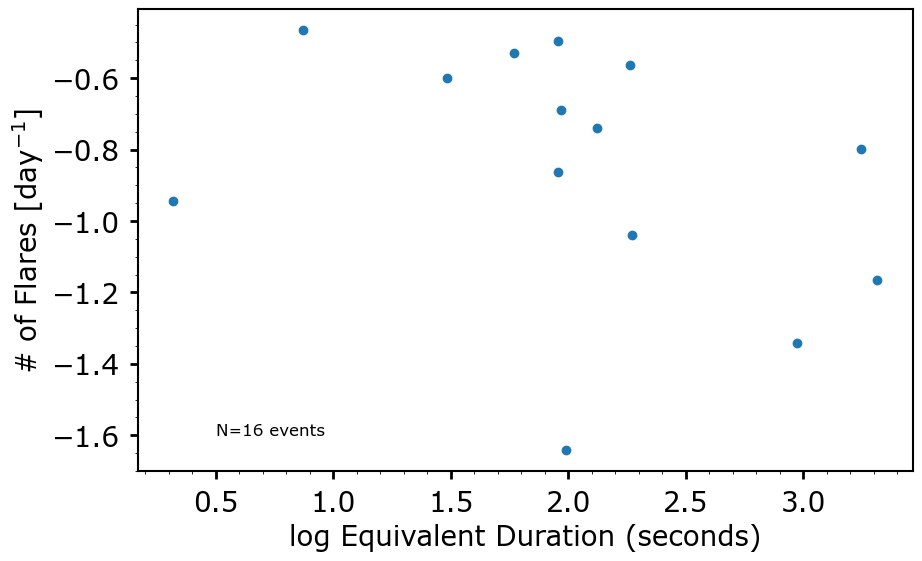

In [25]:
plt.figure(figsize=[10,6])
plt.minorticks_on()
plt.tick_params(direction='out',width=2,length=6,pad=7)


#Plotting the FFD
plt.plot(np.log10(ed[data_sort]*60),ffd_y,'o')
plt.xlabel('log Equivalent Duration (seconds)')
plt.ylabel('# of Flares [day$^{-1}$]')
#plt.xscale('log')

plt.text(.5,-1.6,'N=16 events', fontsize=12)

### Load in k2ffd.csv

These are values Jim sent us to compare datasets

In [26]:
k2 = pd.read_csv('k2ffd.csv')
ffd_x_k2 = k2['log_ED'].values
ffd_y_k2 = k2['Freq'].values

Text(0, 0.5, 'Cumulative Flares per Day')

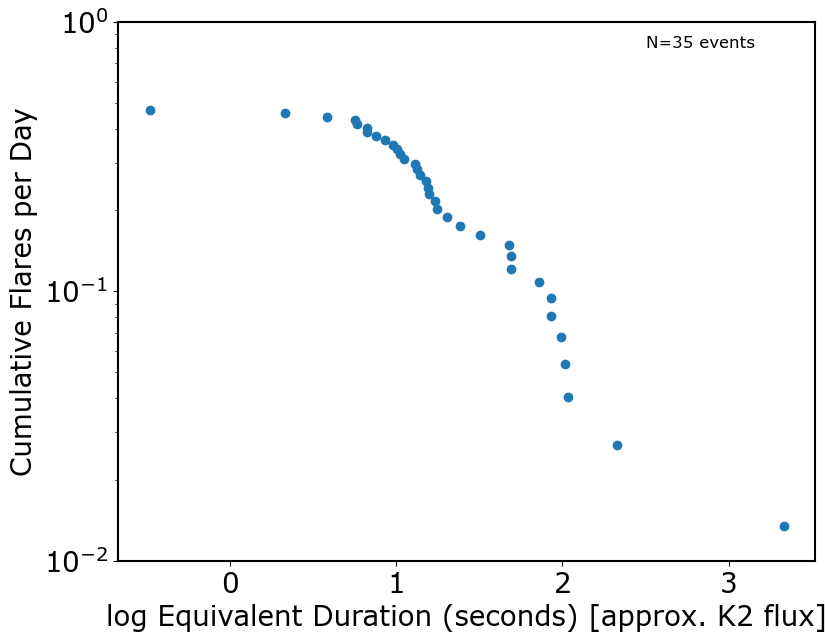

In [27]:
plt.figure(figsize=(9,7))
plt.scatter(ffd_x_k2,ffd_y_k2)
plt.ylim(1e-2,1e0)
plt.yscale('log')
plt.text(2.5, 8e-1, 'N=35 events', fontsize=12)
#plt.legend()
plt.xlabel('log Equivalent Duration (seconds) [approx. K2 flux]')
plt.ylabel('Cumulative Flares per Day')


### Saving our FFD arrays to a file (we will do this together monday)

Step 1: save the arrays to a table

step 2: save the table to a file on your computer



In [ ]:
#data= {'log_E': ffd_x, 'Freq': ffd_y}
#df = pd.DataFrame(data=data)


In [ ]:
#This saves the table to a .csv file on your computer
#df.to_csv('spitzer_ffd.csv')